## Deviance of county or state from USA-model 
I used the **deviance residual**, which is the log likelihood ratio of the data under the USA-model versus the data under a fully-saturated model for that county. Since the data is binary (people either are or are not prescribed the drug in the unit of observed time), the likelihood compares two binomials. From the USA-model we have the estimate of probability of a person observed in bin $b$ getting prescription for drug $d$: $\hat{p}_{d,b}$. Then, total **log likelihood ratio** of observed prescription in the county $c$ versus prescription under the USA model is:
$$ -2( L(USA) - L(sat) )=  2 [ \sum_b y_{d,c,b} \cdot log( { y_{d,c,b} \over { n_{d,c,b} \cdot \hat{p}_{d,b}  } }) +   \sum_b (n_{d,c,b} - y_{d,c,b}) \cdot log( { n_{d,c,b} - y_{d,c,b} \over { n_{d,c,b} \cdot (1 - \hat{p}_{d,b} )} })]$$ 

Derived from this, the deviance residual at a value of covariates (here, $(d,c) = i$) has been suggested, (with $\hat{y}_i  = n_i \cdot \hat{p}_i$ ):
$$G_i = sign(y_i - \hat{y}_i  ) \cdot [ y_i \cdot log( { y_i \over { \hat{y}_i } }) + (n_i - y_i) \cdot log( { n_i - y_i \over { n_i - \hat{y}_i} })]^.5$$ 

Since I am interested in how the county departs from the USA model overall, rather than just at one value of covariates, I take:
$$y_{d,c} = \sum_b y_{d,c,b} $$
$$n_{d,c} = \sum_b n_{d,c,b} $$
$$\hat{y}_{d,c} = \sum_b \hat{y}_{d,c,b} $$

Since different counties have different distributions of people falling into each bin $b$, I actually weighted the sums, using the distribution of the bins nationwide (the data used to create the USA-model), so all counties should be standardized the same way:
$w_{b,d} ={ n_{b,d} \over \sum_b n_{b,d} } $
Then we get the standardized counts: $n_{d,c} = \sum_b w_{b,d} \cdot n_{d,c,b}$; $ y_{d,c} = \sum_b w_{b,d} \cdot y_{d,c,b} $; $ \hat{y}_{d,c} = \sum_b w_{b,d} \cdot \hat{y}_{d,c,b} $;

Finally, we get a residual for each drug and each county.  Counties with a bigger population will have more bins $b$ observed, and the residuals have higher expected variance under the "null hypothesis" that distribution of drug taking in the county follows the USA-model. Below (Fig. 1) I plot the variance of $G_{d,c}$ per county.  So each point represents the variance of the residual across drugs in one county.

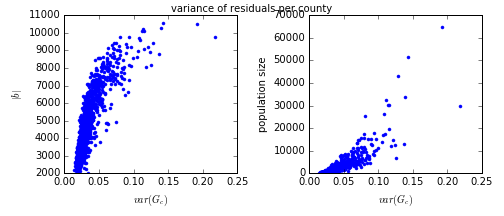

In [2]:
# FIG 1
Image(filename='png/residual_variances.png',width=500)

In order to be able to compare the counties to each other, I normalized the residual values for drugs in each county by the variance in that county, to make a z-score of the residuals.

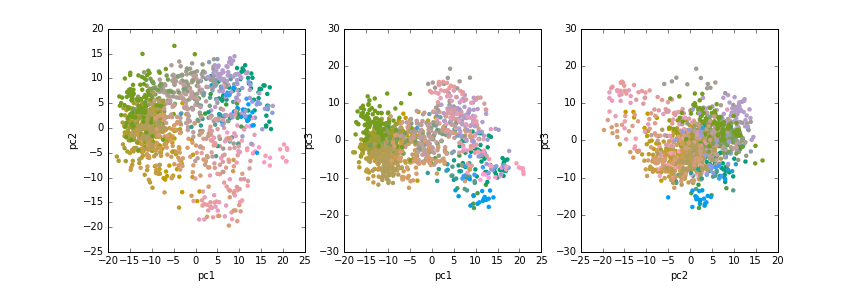

In [3]:
# FIG 2
Image(filename='png/weighted_deviance_residual_pca.png',width=800)

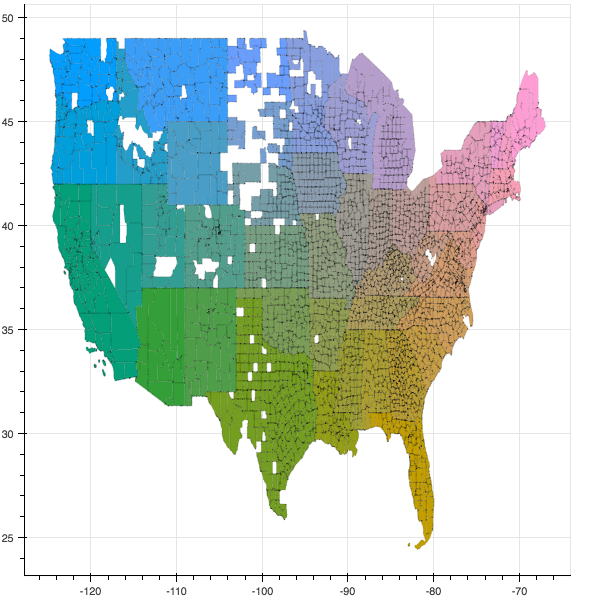

In [5]:
Image(filename='png/usalegend.png',width=300)

Observations from PCA plot (Fig. 2):
- Counties of same state are very closely related
- There's also a higher-level grouping of regions of the county: we saw that PC1 seems to be roughly North-South, and PC2 separates out the Northeast more or less.

## How to analyze drivers of variation?
Two ways I have thought of so far:

1. Analyze distance between counties or states: each state $s$ has a vector $G_{s}$ of length $D$, number of drugs. I can compare states to each other by the distance between these vectors. This has the possible advantage of capturing the systematic differences shown in the PCA
2. Analyze deviance of each drug across counties: so far, this would involve analyzing drugs separately. Each drug $d$ has a vector $G_{d}$ of length $C$, number of counties.

### Analyzing distances between states
Analyzing distances between counties is probably worthwhile, but since counties in the same state are so correlated with each other, this will dominate the results. Below, I show the correlation between vectors of drug-residuals for each pair of states $g_{s,s'} = corr(G_{s}, G_{s'})$

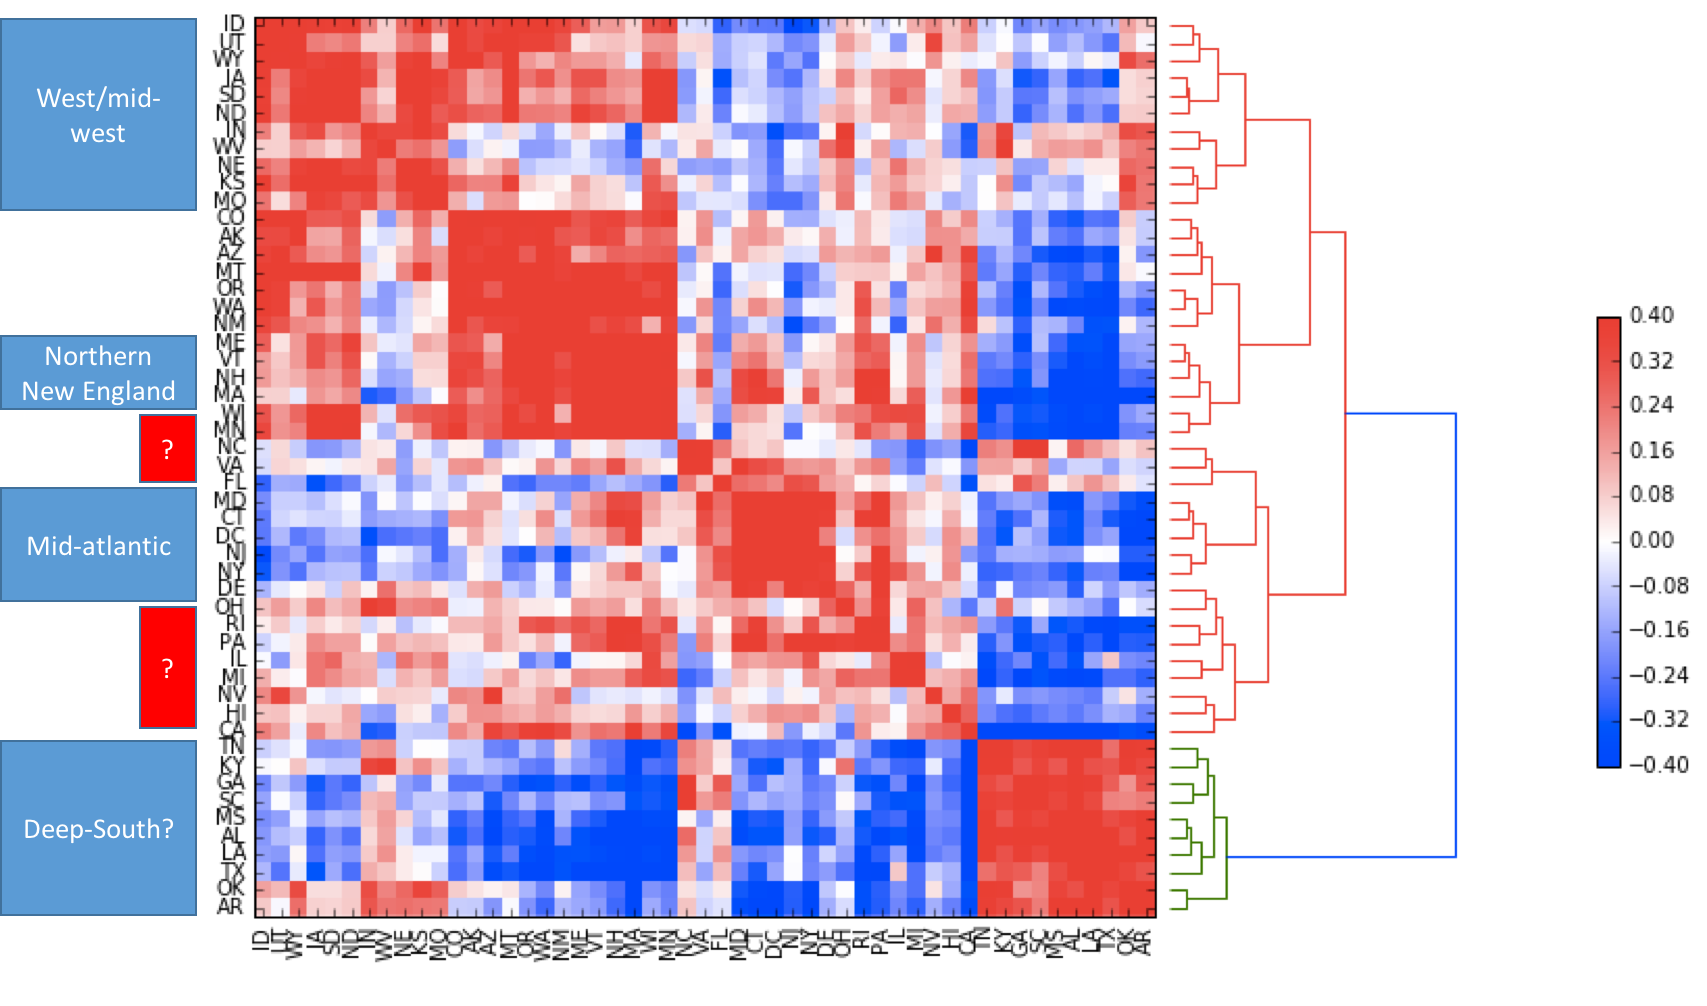

In [11]:
# FIG 3
Image(filename='png/state_dev_annot.png',width=900)

To try to analyze what factor is making the states have similar deviances, I tried a regression. This compared the distance of the states in terms of deviance ($g_{s,s'}$) to their distance in terms of each other covariate, such as $\Delta_{latitude;s,s'} = latitude_s - latitude_{s'}$, etc.  I aggregated the distances between each pair of states in terms of all of these covariates into matrix $ X $:

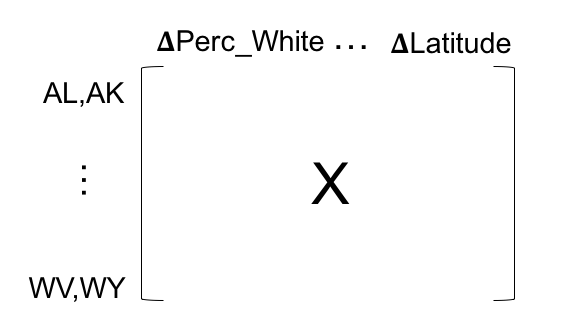

In [13]:
Image(filename='png/matrix_X.png',width=300)

Then I did the regression:
$$ g_{s,s'} \sim X \cdot \beta $$

This is a little strange because a positive sign on any of the $\beta$ would imply that a *larger* difference in a covariate leads to a *smaller* difference in the distance between their residuals.

In [16]:
pd.read_table('state_regression.txt',sep='\t',index_col=0).sort_values('p')

,p,param
const,6.949100e-76,0.323712
Black,2.378850e-30,-1.166018
White,1.235832e-08,0.588530
Urban,2.182760e-08,-0.303040
Persons in Poverty,2.384290e-08,-1.671261
lat,1.071700e-07,-0.007075
Tot Active M.D.s Non-Fed & Fed,8.212820e-05,38.771325
Income,2.011069e-04,-0.000006
lon,2.525644e-03,-0.001435
Asian,4.980325e-03,-0.434791


Black (difference in percent-black) is the most significant covariate here.  White is significant, but then, it is anticorrelated with black and its coefficient is positive so I'm not sure how to interpret this.  Urban and persons in poverty are also strong, as well as latitude.  But really everything is "significant", and I have a feeling it might all be due to some other variable or  because of the flaw in this analysis.

Below (Fig 4) I plotted percent black on the PCA (brighter green = the state is higher percent black, highest is DC).  On different scales I plotted Urban and Poverty (darker pink = higher poverty or urban)

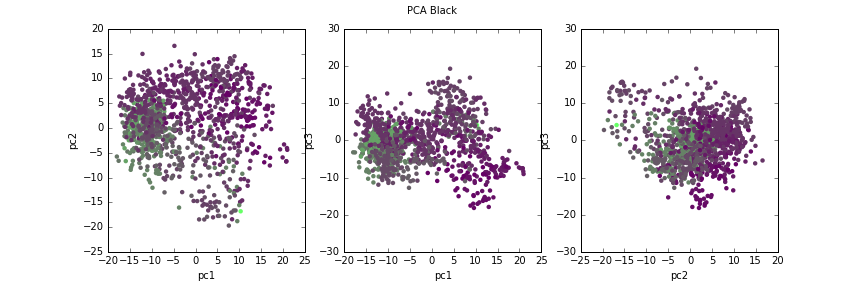

In [20]:
# FIG 4
Image(filename='png/pca_black.png',width=800)

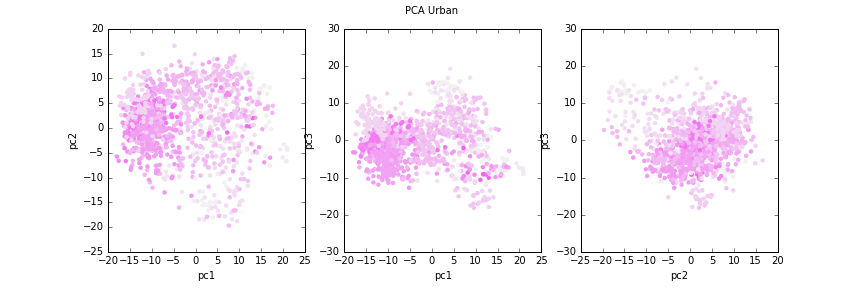

In [21]:
# FIG 5
Image(filename='png/pca_Urban.png',width=800)

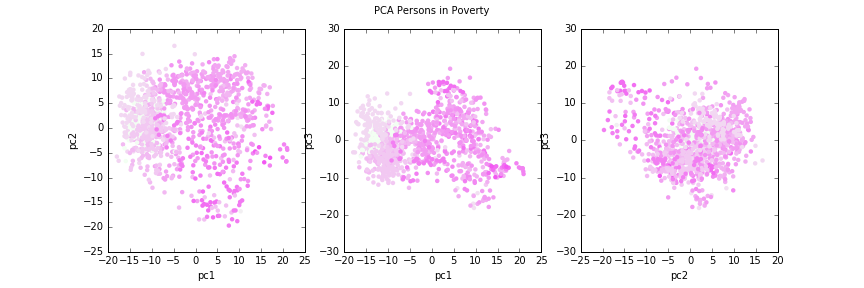

In [22]:
# FIG 6
Image(filename='png/pca_Persons_in_Poverty.png',width=800)

Note that state percent Black is positively correlated with state percent Urban (spearman = .16) and with state percent Poverty (spearman = .39).  But Urban and Poverty are anticorrelated (spearman = -.216)  (ie, DC)

### Analyzing covariates influencing drugs
The idea here is to do a regression on what is influencing drugs across counties, and then somehow combine this across the drugs. For example, below, I plot the residuals per county for a few drugs with positive and negative correlations with each other.  It seems like southern counties have more cardiac drug, more antihistamine, and less antidepressant:

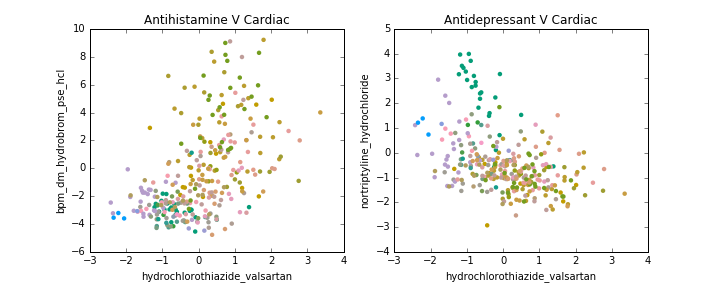

In [23]:
# FIG 7
Image(filename='png/cardiac_correlations.png',width=800)

Here I did a direct regression of the residual value versus the $j$ county covariates (latitude, percent black, etc ): 
$G_{d,c} \sim \sum_j covariate_{c,j} \cdot \beta_{d,j} $ 

Below, I compare the parameter estimates $\beta_{d,j}$, and their t-statistic significances for different antidepressants:

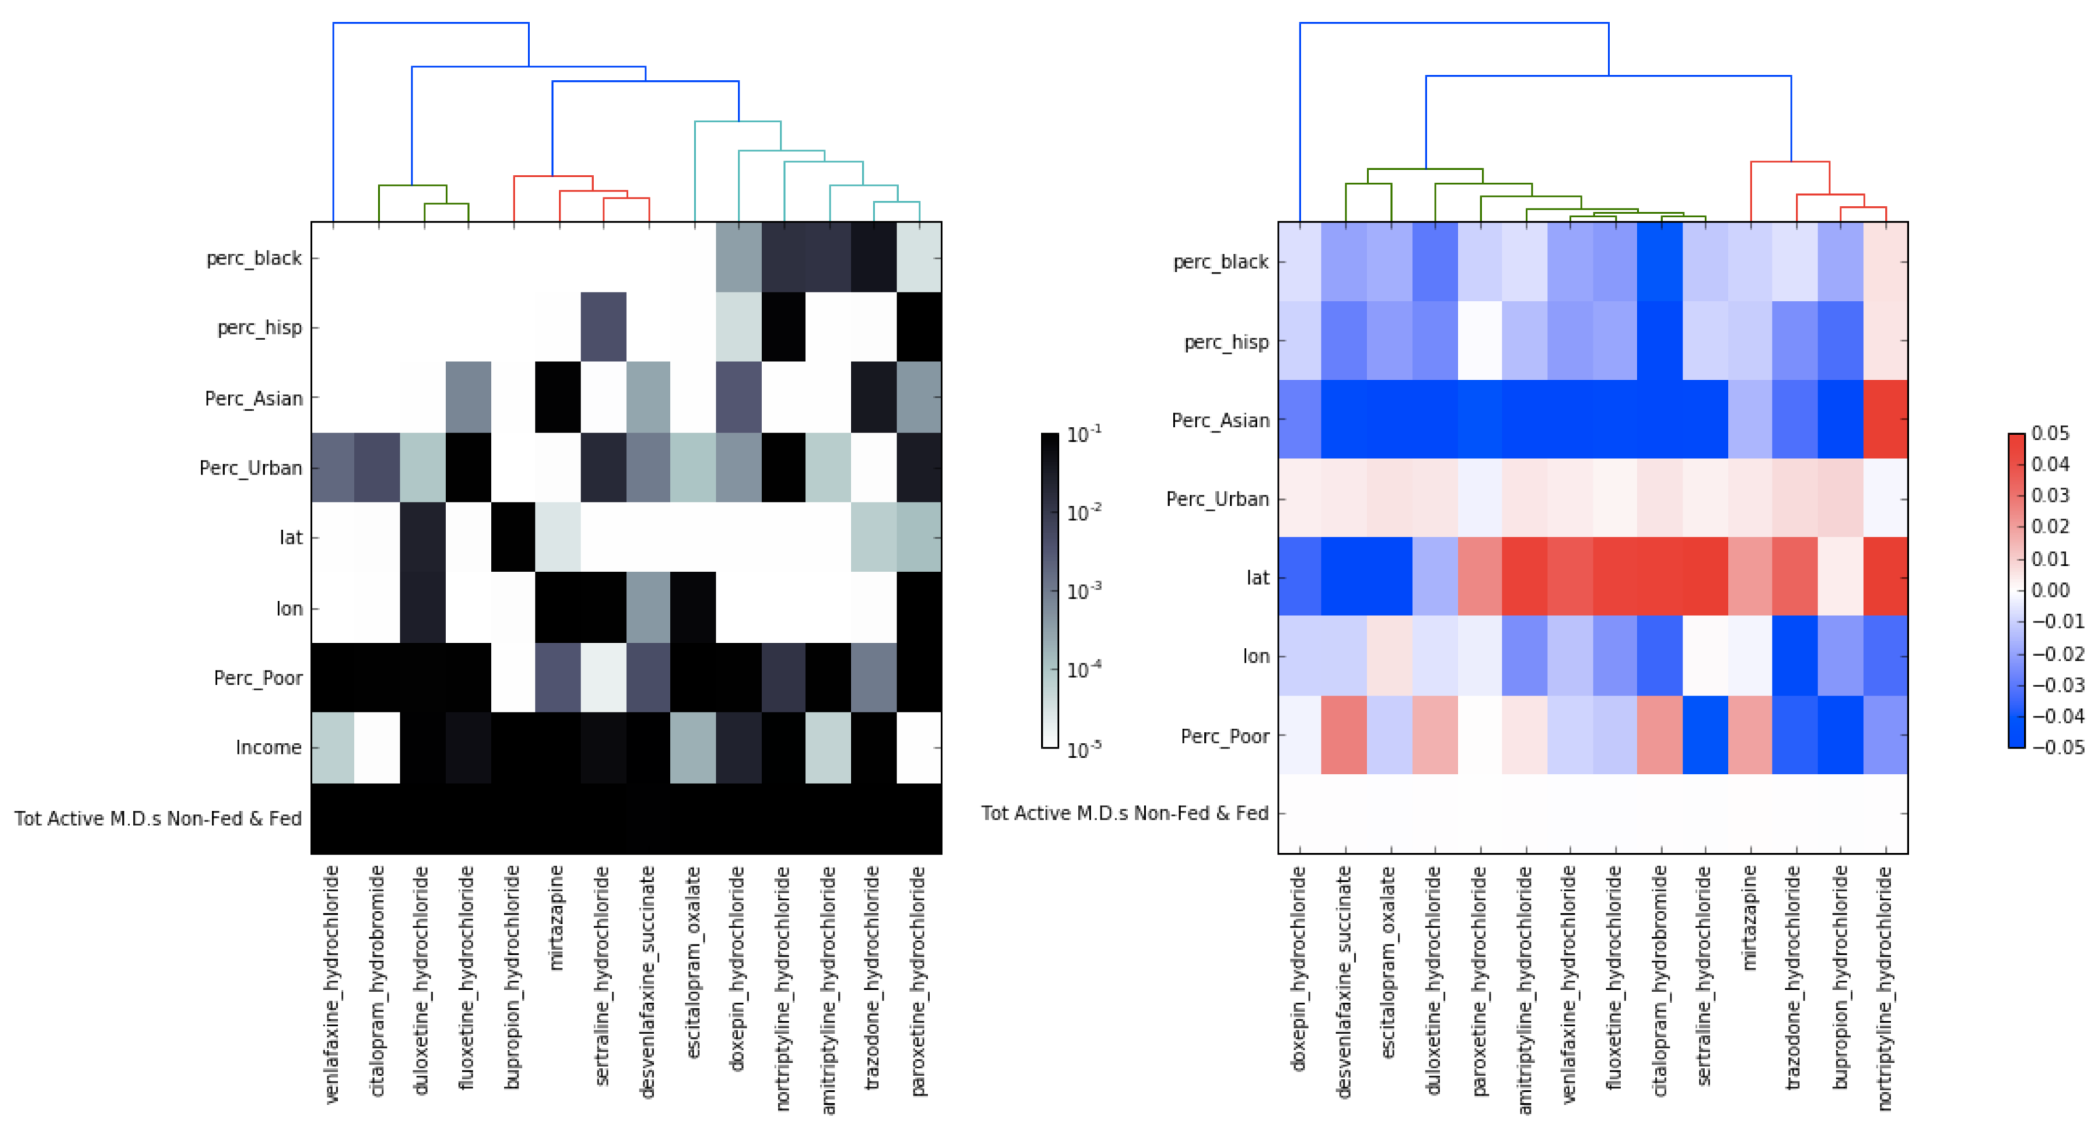

In [25]:
# FIG 8
Image(filename='png/regression_antidepressants.png',width=900)

As we'd expect from the scatter plots above, higher lattitude is correlated with positive deviation of nortriptyline_hydrochloride, and for most antidepressants etc.  There's some consistency across the antidepressants.  However, antidepressants are highly positively correlated with each other --- if one antidepressant is prescribed highly in one county, then others are likely to be as well. Below the x-axis shows correlation between residuals in pairs of antidepressants.  The y-axis shows the correlation between the regression model predictions for the drugs.  The true correlations are much higher than the model correlations.  This makes me think I'm probably just recapitulating the differences that are already obvious in Fig 7.  

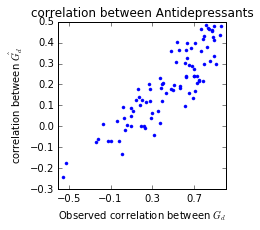

In [28]:
# FIG 9
Image(filename='png/antidepressant_model.png',width=400)

I will maybe try a mixed-effects model with fixed-effects as the covariates above and a random-effect representing the different states.

In [1]:
from IPython.display import Image